<a href="https://colab.research.google.com/github/beckman9191/ECE1513-Introduction-to-Machine-Learning/blob/main/ECE1513_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Zhengnan Zhu


Student number: 1005209971


URL: https://colab.research.google.com/drive/1LQ_R4FXOe1awSExkldDR4ZgzgjHG6_v-?usp=sharing

In [ ]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/indian-liver-patient-records

indian-liver-patient-records.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'indian-liver-patient-records.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

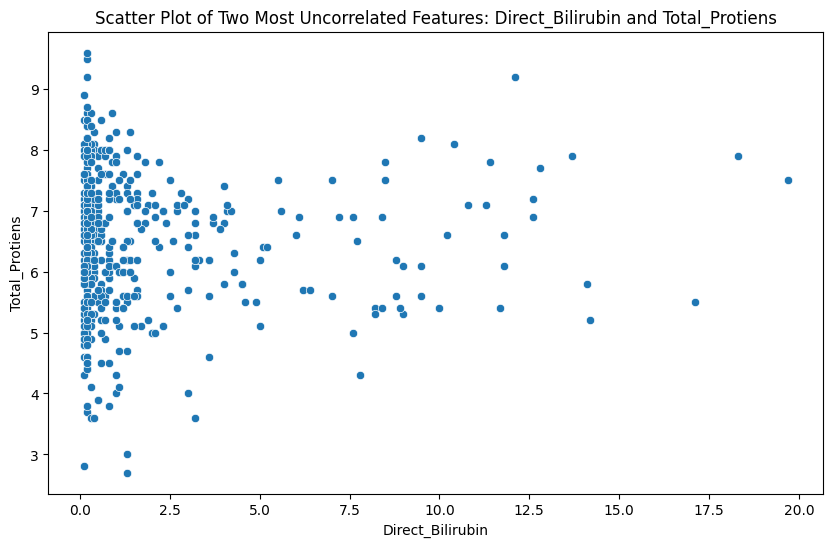

In [ ]:
#3
filepath = 'indian_liver_patient.csv'
df=pd.read_csv(filepath)
df=df.fillna(0)

y=df['Dataset'].astype(float)
X=df.drop(['Dataset'], axis=1)
X['Gender']=np.where(X['Gender']=='Male',1,0)
# Compute the correlation matrix
corr_matrix = X.corr().abs()

# find the most two uncorrelated features
min_corr=corr_matrix[corr_matrix!=1].min().min()

uncorrelated_features = corr_matrix.isin([min_corr]).any()
selected_features = uncorrelated_features[uncorrelated_features].index
#print(selected_features[0])
#print(selected_features[1])
# plot all the data points for the two most uncorrelated features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x=selected_features[0], y=selected_features[1])
plt.title(f"Scatter Plot of Two Most Uncorrelated Features: {selected_features[0]} and {selected_features[1]}")
plt.show()

3)

I observed 2 clusters. It aligns with the number of labels in the dataset.

4a)

K-means clustering partitions data into K distinct cluster baserd on the feature similarity. It assigns data points to the nearest cluster center and iteratively updates the centers.

Advantage(s):


*   fast and suitable for large datasets
*   easy to understand and implement

Disadvantage(s):


*   sensitive to the initial cluster centers and outliers
*   require predetermined K (number of clusters)
  
Use cases: identify fraudulent or criminal activity


\
\
Agglomerative clustering starts with each point as a single cluster and merges them based on similarity.






Advantage(s):


*   do not need to predetermin K


Disadvantage(s):


*   Computationally expensive, especially for large dataset
*   sensitive to outliers

Use Cases: Suitable for gene sequence analysis.


In [ ]:
#4bcd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


minmax_scaler_y=MinMaxScaler()
minmax_scaler_y.fit(y.to_numpy().reshape(-1, 1))
y_normalized=minmax_scaler_y.transform(y.to_numpy().reshape(-1, 1))

best_num_cluster_kmeans=0
best_accuracy_kmeans=0
print("This is the result of K means:")
for i in range(1, 32):

  kmeans=KMeans(n_clusters=i, n_init=10)
  kmeans_clusters=kmeans.fit_predict(X)

  # Compare with ground truth labels
  kmeans_accuracy=accuracy_score(y_normalized, kmeans_clusters)
  print(f"Accuracy: {kmeans_accuracy}, number of clusters is {i}")
  if kmeans_accuracy>best_accuracy_kmeans:
    best_accuracy_kmeans=kmeans_accuracy
    best_num_cluster_kmeans=i

print("----------------------------------------------------------------")
print(f"best K-Means Accuracy: {best_accuracy_kmeans}, number of clusters is {best_num_cluster_kmeans}")


This is the result of K means:
Accuracy: 0.7135506003430532, number of clusters is 1
Accuracy: 0.6946826758147513, number of clusters is 2
Accuracy: 0.6500857632933105, number of clusters is 3
Accuracy: 0.6192109777015438, number of clusters is 4
Accuracy: 0.3053173241852487, number of clusters is 5
Accuracy: 0.5283018867924528, number of clusters is 6
Accuracy: 0.37392795883361923, number of clusters is 7
Accuracy: 0.37564322469982847, number of clusters is 8
Accuracy: 0.08747855917667238, number of clusters is 9
Accuracy: 0.3344768439108062, number of clusters is 10
Accuracy: 0.3379073756432247, number of clusters is 11
Accuracy: 0.32246998284734135, number of clusters is 12
Accuracy: 0.29845626072041165, number of clusters is 13
Accuracy: 0.025728987993138937, number of clusters is 14
Accuracy: 0.2624356775300172, number of clusters is 15
Accuracy: 0.08404802744425385, number of clusters is 16
Accuracy: 0.13893653516295026, number of clusters is 17
Accuracy: 0.06689536878216124, num

In [ ]:
from sklearn.cluster import AgglomerativeClustering

best_num_cluster_hier=0
best_accuracy_hier=0
print("This is the result of hierarchical Clustering:")
for i in range(1, 32):
  hierarchical = AgglomerativeClustering(n_clusters=i)
  hierarchical_clusters = hierarchical.fit_predict(X)
  # Compare with ground truth labels
  hierarchical_accuracy = accuracy_score(y_normalized, hierarchical_clusters)
  print(f"Accuracy: {hierarchical_accuracy}, number of clusters is {i}")
  if hierarchical_accuracy>best_accuracy_hier:
    best_accuracy_hier=hierarchical_accuracy
    best_num_cluster_hier=i
print("----------------------------------------------------------------")
print(f"best hierarchical Clustering Accuracy: {best_accuracy_hier}, number of cluster is {best_num_cluster_hier}")


This is the result of hierarchical Clustering:
Accuracy: 0.7135506003430532, number of clusters is 1
Accuracy: 0.7101200686106347, number of clusters is 2
Accuracy: 0.6826758147512865, number of clusters is 3
Accuracy: 0.6174957118353345, number of clusters is 4
Accuracy: 0.06518010291595197, number of clusters is 5
Accuracy: 0.003430531732418525, number of clusters is 6
Accuracy: 0.0274442538593482, number of clusters is 7
Accuracy: 0.058319039451114926, number of clusters is 8
Accuracy: 0.030874785591766724, number of clusters is 9
Accuracy: 0.38593481989708406, number of clusters is 10
Accuracy: 0.4974271012006861, number of clusters is 11
Accuracy: 0.008576329331046312, number of clusters is 12
Accuracy: 0.032590051457975985, number of clusters is 13
Accuracy: 0.17667238421955403, number of clusters is 14
Accuracy: 0.0274442538593482, number of clusters is 15
Accuracy: 0.04974271012006861, number of clusters is 16
Accuracy: 0.017152658662092625, number of clusters is 17
Accuracy: 0

5a)

PCA is a linear dimensionality reduction techinique that transforms data into a new coordinate system, with the greatest variance by any projection of the data coming first.

Advantage(s):


*   Reduces dimensionality while preserving as much variance as possible
*   Efficient and well-suited for linear data

Disadvantage(s):


*   Less effective on nonlinear data structures
*   Principal components can be difficult to interpret
  
Use cases: Ideal for noise reduction, feature extraction in linearly correlated data, such as image processing or stock market prediction    
\
\
t-SNE is a nonlinear technique that reduces dimensionality while keeping similar instances close and dissimilar instances apart





Advantage(s):


*   Excellent at preserving local structure and revealing clusters in data
*   Efficient and well-suited for non-linear data


Disadvantage(s):


*   Computationally intensive, not suitable for large datasets
*   The results are highly dependent on the chosen hyperparameters

Use cases: Used for visualization in machine learning, can be used in bioinformatics or image recognition

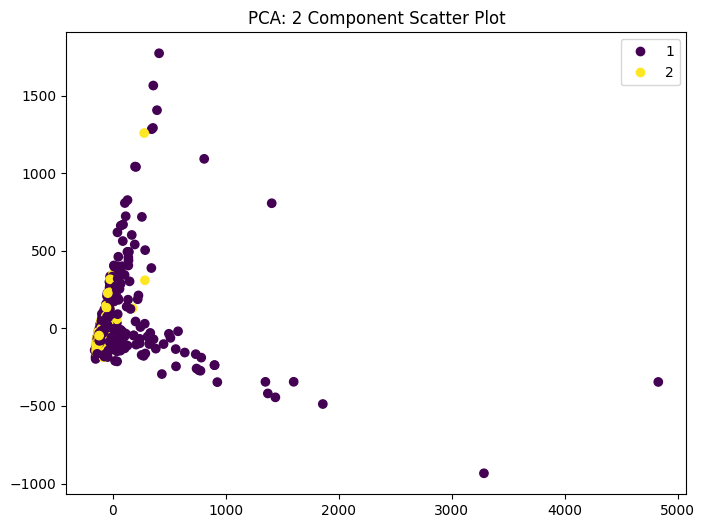

In [ ]:
#5bc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA Plot
plt.figure(figsize=(8, 6))
plot_pca=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.legend(handles=plot_pca.legend_elements()[0], labels=[1, 2])
plt.title("PCA: 2 Component Scatter Plot")
plt.show()

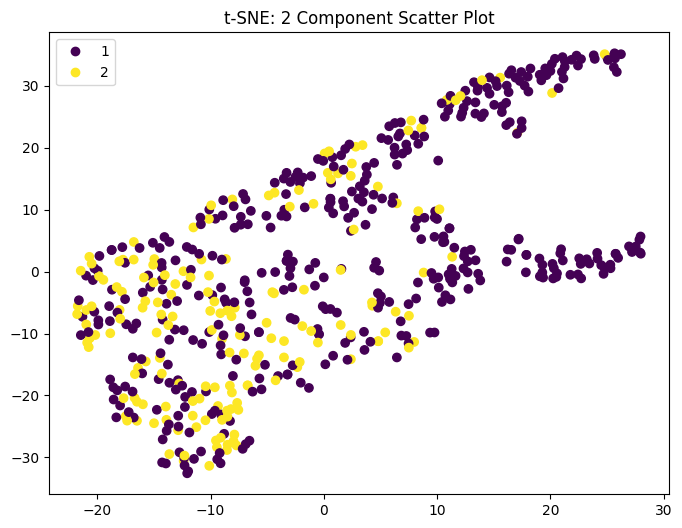

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# t-SNE Plot
plt.figure(figsize=(8, 6))
plot_tsne=plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.legend(handles=plot_tsne.legend_elements()[0], labels=[1, 2])
plt.title("t-SNE: 2 Component Scatter Plot")
plt.show()

5d)

The data points in the scatter plot of PCA are generally to the left, while the data points in the scatter plot of t-SNE show a linear trend.

I think PCA is visually more effective in reducing the data while preserving the categorization as the data points of t-SNE lie along the linear line for both dataset=1 and dataset=2, which is harder to categorize.

The reason is that the data structures are likely to be linear. Therefore, PCA fits better.